<a href="https://colab.research.google.com/github/JaewonLee0217/PWA_APP/blob/main/Footface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great!! 지금입니다 !! 사진을 찍어 주세요


<Figure size 1152x1152 with 0 Axes>

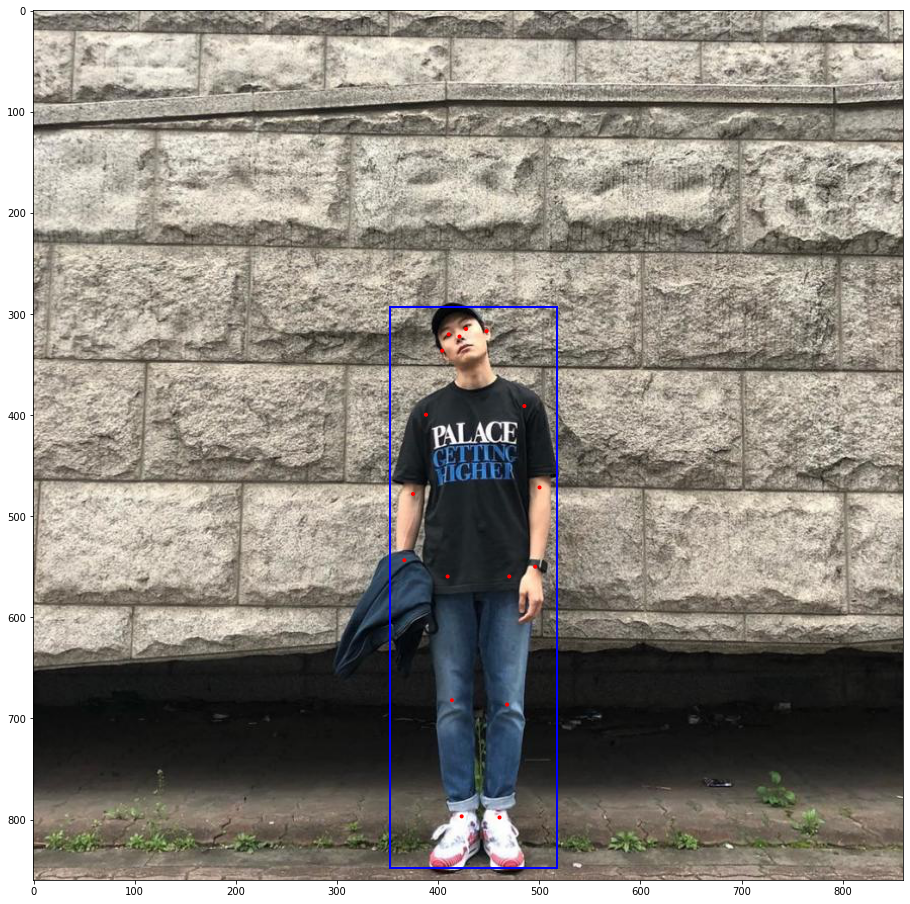

In [65]:
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

#임의의 thres 정의
box_thres1 = img.size[0] * 0.45
box_thres2 = img.size[0] * 0.55
topthres_1 = img.size[1] * 0.35
topthres_2 = img.size[1] * 0.55

bottomthres = img.size[1] * 0.9
#이미지 사이즈 및 임계값 설정
IMG_SIZE = 480
THRESHOLD = 0.95

#model불러오기
model = models.detection.keypointrcnn_resnet50_fpn(pretrained=True).eval()

#예시(본-> frame 로드 해서 동작)
img = Image.open('./ryu.jpg')
#img = img.resize((IMG_SIZE, int(img.height * IMG_SIZE / img.width)))

plt.figure(figsize=(16, 16))
trf = T.Compose([
    T.ToTensor()
])

input_img = trf(img)
out = model([input_img])[0]
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO
]

fig, ax = plt.subplots(1, figsize=(16, 16))
ax.imshow(img)

for box, score, keypoints,labels in zip(out['boxes'], out['scores'], out['keypoints'],out ['labels']):
    score = score.detach().numpy()
    

    if score < THRESHOLD:
        continue

    

    box = box.detach().numpy()
    mid_box = 0.5 * (box[0] + box[2])

    
    #y축 기준의 알고리즘
    keypoints = keypoints.detach().numpy()[:, :2]
    temp_face = keypoints[0][1]
    # if temp_face <topthres_1 and temp_face > topthres_2:
    #   print("얼굴 단계 완료")

    
    #keypoints[15],keypoint[16] 왼쪽 발목, 오른쪽 발목
    temp_leftfoot = keypoints[15][1]
    temp_rigthfoot = keypoints[16][1]

    


    #print(keypoints[15])
    #print(keypoints[16])

   

    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)

    # 17 keypoints
    for k in keypoints:
      circle = patches.Circle((k[0], k[1]), radius=2, facecolor='r')
      ax.add_patch(circle)
    

if temp_face >topthres_1 and temp_face < topthres_2:
  if temp_leftfoot > bottomthres and temp_rigthfoot > bottomthres:
    print("Great!! 지금입니다 !! 사진을 찍어 주세요")
  else:
    print("발을 하단에 맞춰 주세요")
else:
  print("얼굴을 가운데로 맞춰주세요")
if mid_box <box_thres1:
  print("카메라 각도를 왼쪽으로 조금 돌려주세요")
if mid_box >box_thres2:
  print("카메라 각도를 오른쪽으로 조금 돌려주세요")






In [ ]:
out